Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Libraries

In [3]:
import umint
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics.pairwise import euclidean_distances
import random

# Importing Data

In [4]:
dir = 'D:/Research/UMINTv3/'
rna = pd.read_csv(dir+'Data/preprocessedData/cbmc8k/cbmc8k_rna_scaled.csv',header = 0 , index_col= 0)
adt = pd.read_csv(dir+'Data/preprocessedData/cbmc8k/cbmc8k_adt_scaled.csv',header = 0 , index_col= 0)
labels = pd.read_csv(dir+'Labels/cbmc8k/cbmc8k_groundTruth.csv',header = 0 , index_col= 0)

x1 = rna.T
x2 = adt.T
y = labels

z = pd.concat([x1, x2], axis=1)

In [5]:
x1.head()

,A4GALT,ABCB10,ABCC3,ABCG2,ABI3,AC002454.1,AC004381.6,AC004791.2,AC005339.2,AC005356.1,...,MOUSE-Rtn4,MOUSE-Ppp1ca,MOUSE-Cald1,MOUSE-Rps26,MOUSE-Ctsl,MOUSE-Tnfrsf12a,MOUSE-Esd,MOUSE-Acta2,MOUSE-Arpc2,MOUSE-Calr
CTGTTTACACCGCTAG,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.666522,2.806501,4.390655,2.338495,4.236169,3.291269,3.338256,1.181500,3.575336,2.491014
CTCTACGGTGTGGCTC,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.431149,3.219714,3.572171,3.176395,3.501385,3.099354,3.375631,3.738814,3.165883,2.803176
AGCAGCCAGGCTCATT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.810213,3.309678,3.658060,3.236889,3.957931,3.465798,2.787275,2.762576,3.510315,3.762173
GAATAAGAGATCCCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.686728,3.248412,3.565898,3.485953,3.325856,2.842990,3.483046,2.815389,3.319044,4.037947
GTGCATAGTCATGCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.561990,3.678177,4.183636,3.325419,2.450436,2.636636,1.886444,6.334562,3.971224,2.929176


In [6]:
x2.head()

,CD3,CD4,CD8,CD45RA,CD56,CD16,CD11c,CD14,CD19,CD34
CTGTTTACACCGCTAG,-0.741173,-0.873699,-0.085744,-0.950687,0.121163,1.251010,-0.320210,-0.348140,0.128217,2.459087
CTCTACGGTGTGGCTC,-0.850893,-1.095422,-0.290711,0.585319,0.001553,0.289176,-0.503428,-1.099359,3.207548,0.425467
AGCAGCCAGGCTCATT,-0.546698,-0.611202,-0.186538,-0.789086,0.584921,0.729284,-0.402209,-0.568467,0.269554,0.720761
GAATAAGAGATCCCAT,-0.615625,-0.722842,-0.046764,-0.987191,0.491757,0.708220,-0.428475,-0.404677,0.143019,1.515627
GTGCATAGTCATGCAT,-0.758512,-0.867586,-0.015801,-0.934387,0.670334,1.155465,-0.266490,-0.757092,0.176457,1.828776


In [7]:
le = preprocessing.LabelEncoder()
y = pd.DataFrame(le.fit_transform(np.ravel(labels)))

In [8]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Proposed UMINT architecture
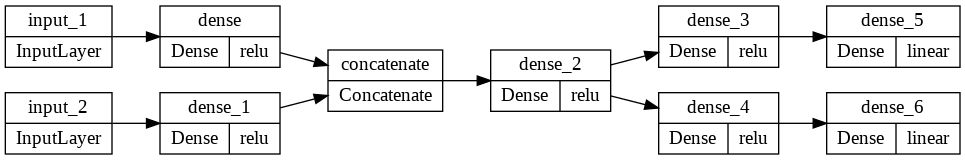

In [9]:
# Original pair-wise distances
dist_orig1 = np.square(euclidean_distances(x1, x1)).flatten()
dist_orig2 = np.square(euclidean_distances(x2, x2)).flatten()

In [10]:
num_clusters = len(np.unique(y))
recons={}
result_agl = {}
result_km = {}
seed = []

for i in range(10):
    print('#Run: ', i+1)
    
    sd = random.randint(0, 100)
    seed.append(sd)
    
    x1_train, x1_test, x2_train, x2_test, z_train, z_test, y_train, y_test = train_test_split(x1, x2, z, y, test_size=0.2,
                                                                                          random_state=sd)
    #UMINT
    MyEncoder, MyAE = umint.CombinedEncoder([x1_train, x2_train], [x1_test, x2_test], [128, 10], 64, 98, 0.0001, 0.001, 25, 16)
    low = MyEncoder.predict([x1, x2])
    clusters_agl = AgglomerativeClustering(n_clusters= num_clusters).fit_predict(low)
    clusters_km = KMeans(n_clusters= num_clusters).fit_predict(low)
    
    # pair-wise distances
    dist_EncoderRNA = np.square(euclidean_distances(MyAE.predict([x1, x2])[0], MyAE.predict([x1, x2])[0])).flatten()
    dist_EncoderADT = np.square(euclidean_distances(MyAE.predict([x1, x2])[1], MyAE.predict([x1, x2])[1])).flatten()  
    coef_RNA, p_RNA = pearsonr(dist_orig1, dist_EncoderRNA)
    coef_ADT, p_ADT = pearsonr(dist_orig2, dist_EncoderADT)

    
    recons[i] = [coef_RNA, coef_ADT]
    result_agl[i] = [adjusted_rand_score(y[0], clusters_agl), fowlkes_mallows_score(y[0], clusters_agl)]
    result_km[i] = [adjusted_rand_score(y[0], clusters_km), fowlkes_mallows_score(y[0], clusters_km)]

#Run:  1
270/270 [==============================] - 0s 1ms/step
#Run:  2
270/270 [==============================] - 0s 1ms/step
#Run:  3
270/270 [==============================] - 0s 1ms/step
#Run:  4
270/270 [==============================] - 0s 1ms/step
#Run:  5
270/270 [==============================] - 0s 1ms/step
#Run:  6
270/270 [==============================] - 0s 1ms/step
#Run:  7
270/270 [==============================] - 0s 2ms/step
#Run:  8
270/270 [==============================] - 0s 1ms/step
#Run:  9
270/270 [==============================] - 0s 1ms/step
#Run:  10
270/270 [==============================] - 0s 1ms/step


In [11]:
r1 = [pd.DataFrame(np.ravel(recons[i])).T for i in range(len(recons))]
rec1 = pd.concat(r1)
rec1.index = range(len(recons))
rec1.columns = ['Pearson_RNA_UMINT','Pearson_ADT_UMINT']
rec1.loc[len(recons)] = rec1.mean(numeric_only=True, axis=0)
rec1.rename(index={len(recons):'avg'},inplace=True)
rec1

,Pearson_RNA_UMINT,Pearson_ADT_UMINT
0,0.864208,0.989710
1,0.882626,0.988280
2,0.904518,0.987545
3,0.875396,0.984850
4,0.842520,0.984652
5,0.858306,0.986244
6,0.880060,0.984658
7,0.905999,0.987385
8,0.860010,0.986398
9,0.863914,0.988572


In [12]:
r2 = [pd.DataFrame(np.ravel(result_agl[i])).T for i in range(len(result_agl))]
rec2 = pd.concat(r2)
rec2.index = range(len(result_agl))
rec2.columns = ['ARI_Agglomaretive','FMI_Agglomaretive']
rec2.loc[len(result_agl)] = rec2.mean(numeric_only=True, axis=0)
rec2.rename(index={len(result_agl):'avg'},inplace=True)
rec2

,ARI_Agglomaretive,FMI_Agglomaretive
0,0.675163,0.757402
1,0.694049,0.768621
2,0.677669,0.758688
3,0.679347,0.757794
4,0.695976,0.770213
5,0.672889,0.754925
6,0.686447,0.763775
7,0.684089,0.762386
8,0.682237,0.761769
9,0.679519,0.760062


In [14]:
r3 = [pd.DataFrame(np.ravel(result_km[i])).T for i in range(len(result_km))]
rec3 = pd.concat(r3)
rec3.index = range(len(result_km))
rec3.columns = ['ARI_KMeans','FMI_KMeans']
rec3.loc[len(result_km)] = rec3.mean(numeric_only=True, axis=0)
rec3.rename(index={len(result_km):'avg'},inplace=True)
rec3

,ARI_KMeans,FMI_KMeans
0,0.532036,0.628410
1,0.635606,0.710814
2,0.696640,0.769362
3,0.677204,0.750723
4,0.665630,0.739785
5,0.629008,0.704957
6,0.646151,0.728458
7,0.669469,0.744608
8,0.675672,0.749358
9,0.581736,0.660225
